## Consider the movie dataset. Fill the dataset with the details like Movie name, Director name, Released Year and Movie type. Predict the next movie type for a particular director. Apply ID3 Algorithm

## Abdul Aziz A.B
## 20BRS1185


In [60]:
#importing libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from pprint import pprint
from warnings import filterwarnings
filterwarnings('ignore')


# Preprocessing the dataset

In [61]:
#importing the dataset
dataset = pd.read_csv('datasets/IMDB-Movie-Data.csv')
dataset.head()

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,126.46,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02,40.0


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Actors              1000 non-null   object 
 4   Year                1000 non-null   int64  
 5   Runtime (Minutes)   1000 non-null   int64  
 6   Rating              1000 non-null   float64
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           936 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [63]:
#checking for null values
dataset.isnull().sum()

Title                   0
Genre                   0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [64]:
#dropping the null values
dataset = dataset.dropna()
dataset.isnull().sum()

Title                 0
Genre                 0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [65]:
#checking the shape of the dataset
print(dataset.shape)
print(dataset.dtypes)


(838, 9)
Title                  object
Genre                  object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Revenue (Millions)    float64
Metascore             float64
dtype: object


In [66]:
#checking the count of the unique values in the dataset
print(dataset['Director'].value_counts())
print(dataset['Title'].value_counts())
print(dataset['Year'].value_counts())
print(dataset['Genre'].value_counts())

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64
The Host                    2
Blood Father                1
Unfriended                  1
American Reunion            1
The Pursuit of Happyness    1
                           ..
The 5th Wave                1
The Visit                   1
Fast Five                   1
Step Up                     1
Nine Lives                  1
Name: Title, Length: 837, dtype: int64
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64
Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                  

In [67]:
#checking the correlation between the variables
dataset.corr()

,Year,Runtime (Minutes),Rating,Revenue (Millions),Metascore
Year,1.000000,-0.101933,-0.145703,-0.129198,-0.062303
Runtime (Minutes),-0.101933,1.000000,0.374566,0.281721,0.221397
Rating,-0.145703,0.374566,1.000000,0.217106,0.672731
Revenue (Millions),-0.129198,0.281721,0.217106,1.000000,0.142397
Metascore,-0.062303,0.221397,0.672731,0.142397,1.000000


<AxesSubplot: >

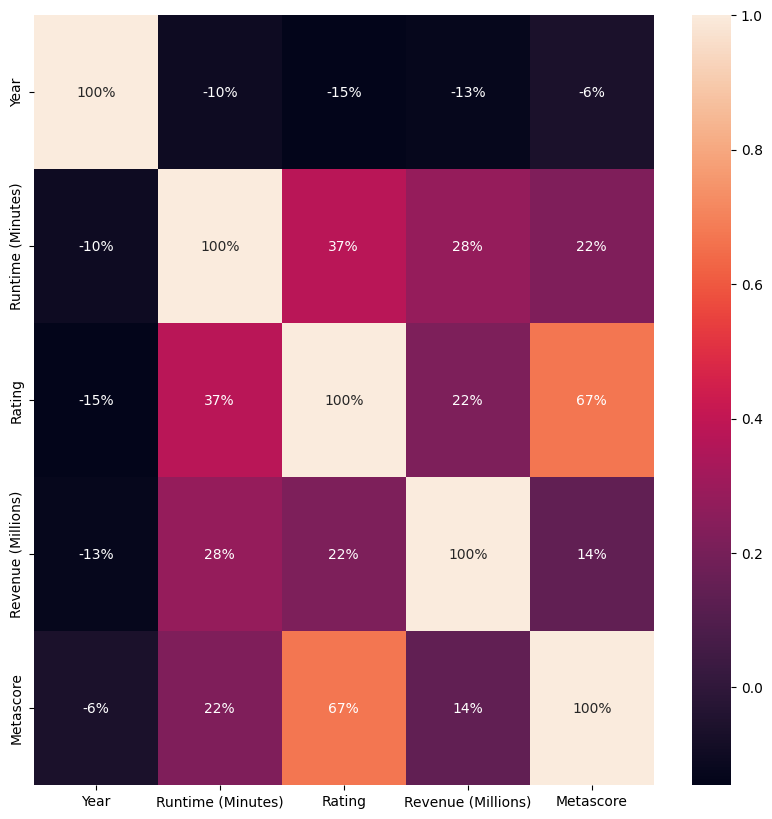

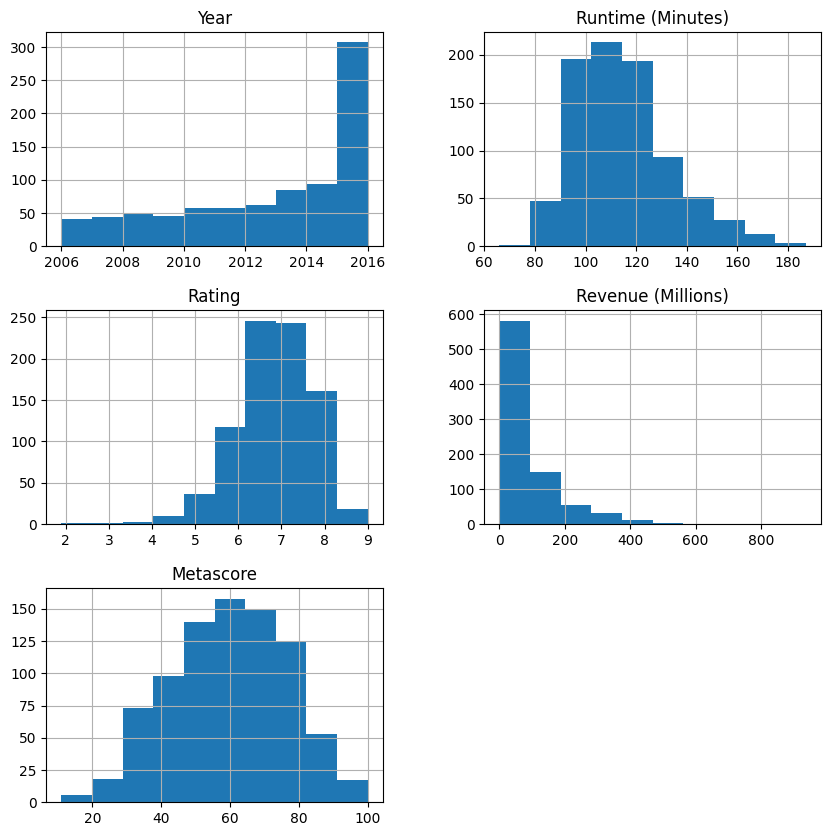

In [68]:
#plotting the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

#checking the distribution of the variables
dataset.hist(figsize=(10,10))

#checking the skewness of the variables
dataset.skew()

#plotting the skewness of the variables
dataset.skew().plot(kind='bar')

Year                    AxesSubplot(0.125,0.839474;0.0407895x0.0405263)
Runtime (Minutes)     AxesSubplot(0.173947,0.839474;0.0407895x0.0405...
Rating                AxesSubplot(0.222895,0.839474;0.0407895x0.0405...
Revenue (Millions)    AxesSubplot(0.271842,0.839474;0.0407895x0.0405...
Metascore             AxesSubplot(0.320789,0.839474;0.0407895x0.0405...
dtype: object

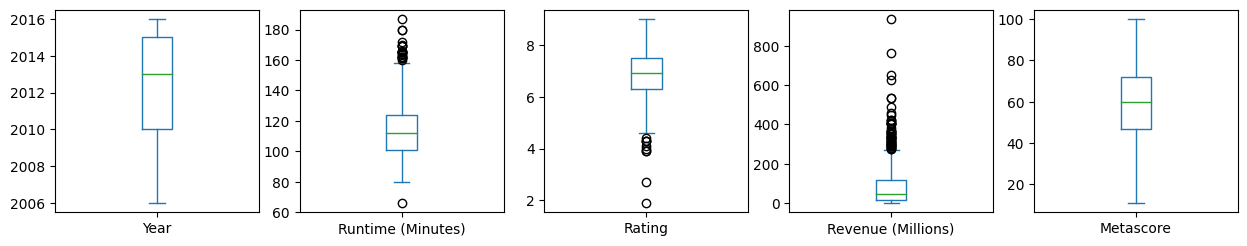

In [69]:
#checking the outliers of the variables
dataset.plot(kind='box', subplots=True, layout=(16,16), sharex=False, sharey=False, figsize=(50,50))

In [70]:
#check na values
dataset.isnull().sum()

Title                 0
Genre                 0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [71]:
dataset.columns

Index(['Title', 'Genre', 'Director', 'Actors', 'Year', 'Runtime (Minutes)',
       'Rating', 'Revenue (Millions)', 'Metascore'],
      dtype='object')

In [73]:
#sample input - predict('Christopher Nolan', Metascore, Rating, Actors)
#sample output - ['Action', 'Adventure', 'Sci-Fi']

#predicting the movie type for a particular director using id3 algorithm
def ID3 (data, originaldata, features, target_attribute_name, parent_node_class = None):
    
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
    
    elif len(features) ==0:
        return parent_node_class
    
    else:
        parent_node_class = np.unique
        (data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data, dataset, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree
        return(tree)

#calculating the entropy
def entropy(probs):
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

#calculating the information gain
def InfoGain(data, feature, target_attribute_name):
    total_entropy = entropy(data[target_attribute_name].value_counts(normalize=True))
    vals, counts= np.unique(data[feature], return_counts=True)
    Weighted_Entropy = sum([(counts[i]/np.sum(counts))*entropy(data.where(data[feature]==vals[i]).dropna()[target_attribute_name].value_counts(normalize=True)) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


In [77]:
#predicting the movie type for a particular director using id3 algorithm
def predict(director, metascore, rating, actors):
    #creating the dataset
    data = pd.DataFrame({'Director': [director], 'Metascore': [
                        metascore], 'Rating': [rating], 'Actors': [actors]})
    #creating the features
    features = ['Director', 'Metascore', 'Rating', 'Actors']
    #creating the target attribute
    target_attribute_name = 'Genre'
    #calling the id3 algorithm
    tree = ID3(dataset, dataset, features, target_attribute_name)
    #predicting the movie type
    prediction = tree['Director'][director]
    return prediction


In [84]:
def main():
    #creating the dataset
    data = pd.DataFrame({'Director': ['Christopher Nolan'], 'Metascore': [
                        74], 'Rating': [8.8], 'Actors': ['Leonardo DiCaprio']})
    #creating the features
    features = ['Director', 'Metascore', 'Rating', 'Actors']
    #creating the target attribute
    target_attribute_name = 'Genre'
    #calling the id3 algorithm
    tree = ID3(dataset, dataset, features, target_attribute_name)
    #predicting the movie type
    prediction = tree['Director']['Christopher Nolan']
    print(prediction)


main()

['Sci-fi', 'Thriller', 'Drama']


In [91]:
#construct tree 
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


#creating the features
features = ['Director', 'Metascore', 'Rating', 'Actors']
#creating the target attribute
target_attribute_name = 'Genre'
#creating the dataset
X = dataset[features]
y = dataset[target_attribute_name]
#encode the dataset
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#creating the decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
#predicting the movie type
y_pred = dtree.predict(X_test)
#checking the accuracy
print(accuracy_score(y_test, y_pred))
#plotting the decision tree
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, class_names=dataset[target_attribute_name].unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)


0.9761904761904762


## Since the graph was too large for this dataset, I exported it and stored it as a tree.pdf file that is attached with this document- can zoom in to see the tree on that file

In [90]:
graph